In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd      
import numpy as np   
import matplotlib.pyplot as plt   
from sklearn.decomposition import PCA, FactorAnalysis
import statsmodels.formula.api as smf

In [ ]:
train = pd.read_csv('AMES_TRAIN.csv')
test = pd.read_csv('AMES_TEST_SFAM.csv')
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]
train['qualityindex'] = (train.overallqual*train.overallcond)
train['totalsqftcalc'] = (train.bsmtfinsf1+train.bsmtfinsf2+train.grlivarea)
train['pricesqfoot'] = (train['saleprice']/train['totalsqftcalc'])
test['qualityindex'] = (test.overallqual*test.overallcond)
test['totalsqftcalc'] = (test.bsmtfinsf1+test.bsmtfinsf2+test.grlivarea)
test['pricesqfoot'] = (test['saleprice']/test['totalsqftcalc'])
train=train.replace({'totalsqftcalc': {np.NaN : 10000}})
train=train.replace({'lotarea': {np.NaN : 10000}})
train=train.replace({'lotfrontage': {np.NaN : 10000}})
test=test.replace({'totalsqftcalc': {np.NaN : 10000}})
test=test.replace({'lotarea': {np.NaN : 10000}})
test=test.replace({'lotfrontage': {np.NaN : 10000}})

In [ ]:
test['Neighborhood_Group'] = np.nan
#added due to later work with Neighborhood groupings

In [ ]:
train = train[train['totalsqftcalc'] < 6000]
train = train[train['salecondition'] == 'Normal']
train = train[train['saleprice'] <= 500000]
train = train[train['lotarea'] <= 25000]
train = train[train['zoning'] != 'I']
train = train[train['zoning'] != 'C']
train = train[train['zoning'] != 'A']

In [ ]:
X = train[['saleprice','qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']].copy()
X1 = train[['qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']].copy()
corr = X[X.columns].corr()
corr

In [39]:
cdata = test.loc[:,['saleprice','qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']] 
corr = cdata[cdata.columns].corr()
print(corr)

               saleprice  qualityindex  totalsqftcalc  yearbuilt   lotarea  \
saleprice            NaN           NaN            NaN        NaN       NaN   
qualityindex         NaN      1.000000       0.376725   0.188088  0.090987   
totalsqftcalc        NaN      0.376725       1.000000   0.350976  0.318766   
yearbuilt            NaN      0.188088       0.350976   1.000000  0.091227   
lotarea              NaN      0.090987       0.318766   0.091227  1.000000   
lotfrontage          NaN     -0.038343       0.080916   0.027659  0.150816   

               lotfrontage  
saleprice              NaN  
qualityindex     -0.038343  
totalsqftcalc     0.080916  
yearbuilt         0.027659  
lotarea           0.150816  
lotfrontage       1.000000  


In [42]:
pca_data = test.loc[:,['qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']] 
pca = PCA()
P = pca.fit(pca_data)

In [43]:
np.set_printoptions(threshold=np.inf) 
np.around([pca.components_], decimals=3)

array([[[ 0.   ,  0.035,  0.   ,  0.994,  0.108],
        [-0.   ,  0.003,  0.   , -0.108,  0.994],
        [ 0.005,  0.999,  0.013, -0.034, -0.007],
        [-0.022,  0.014, -1.   , -0.   ,  0.   ],
        [ 1.   , -0.004, -0.022,  0.   ,  0.   ]]])

In [44]:
pca_explained_variance = pca.explained_variance_ratio_
print('Proportion of variance explained:', pca_explained_variance)

Proportion of variance explained: [0.783 0.209 0.008 0.    0.   ]


In [45]:
pca_data_cormat = np.corrcoef(pca_data.T)
eigenvalues, eigenvectors = np.linalg.eig(pca_data_cormat)
np.around([eigenvalues], decimals=3)

array([[1.759, 0.506, 1.102, 0.785, 0.848]])

In [46]:
print('Linear algebra demonstration: Proportion of variance explained: ',
    eigenvalues/eigenvalues.sum())
np.around([eigenvectors], decimals=3)

Linear algebra demonstration: Proportion of variance explained:  [0.352 0.101 0.22  0.157 0.17 ]


array([[[-0.465, -0.402,  0.384,  0.661, -0.191],
        [-0.626,  0.776,  0.038, -0.011, -0.067],
        [-0.458, -0.33 ,  0.207, -0.454,  0.657],
        [-0.402, -0.356, -0.477, -0.389, -0.577],
        [-0.14 , -0.031, -0.762,  0.453,  0.44 ]]])

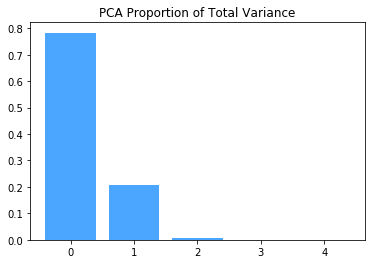

In [47]:
plt.bar(np.arange(len(pca_explained_variance)), pca_explained_variance, 
    color = 'dodgerblue', alpha = 0.8, align = 'center')
plt.title('PCA Proportion of Total Variance')
plt.show()

   eigenvalues  0
0     1.759157  1
1     0.505695  2
2     1.102185  3
3     0.784933  4
4     0.848030  5
5          NaN  6
6          NaN  7
7          NaN  8
8          NaN  9


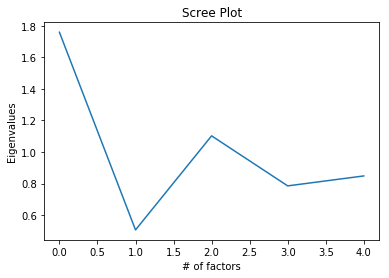

In [48]:
d = {'eigenvalues': eigenvalues }
df1 = pd.DataFrame(data=d)
df2 =pd.Series([1,2,3,4,5,6,7,8,9])
#df2 = {'factors': factors}
# merge eigenvalues with # of factors
result = pd.concat([df1, df2], axis=1, join_axes=[df2.index])
print (result)

def scat(dataframe,var1,var2):
    dataframe[var2].plot()     
    plt.title('Scree Plot')
    plt.xlabel('# of factors')
    plt.ylabel('Eigenvalues')
    
scat(result,'0','eigenvalues')
#retain two factors
plt.show()

In [49]:
pca_loadings = pca.components_.T

In [50]:
np.set_printoptions(precision = 3, suppress = True,
    formatter={'float': '{: 0.3f}'.format})
print(pca_loadings[:,0:3])

[[ 0.000 -0.000  0.005]
 [ 0.035  0.003  0.999]
 [ 0.000  0.000  0.013]
 [ 0.994 -0.108 -0.034]
 [ 0.108  0.994 -0.007]]


In [51]:
C = pca.transform(pca_data)

In [108]:
pca_data['pca1'] = C[:,0]
pca_data['pca2'] = C[:,1]
pca_data['pca3'] = C[:,2]

In [110]:
pca_data

,qualityindex,totalsqftcalc,yearbuilt,lotarea,lotfrontage,pca1,pca2,pca3
0,15,729,1945,12366,69.0,913.330587,-1999.393544,-1354.776367
1,40,1836,2008,8125,65.0,-3262.045870,-1540.533717,-102.118822
2,48,2504,1964,9760,80.0,-1612.732453,-1700.429274,508.667898
3,40,2802,2004,10141,76.0,-1224.227634,-1744.663651,793.914713
4,35,1316,2007,11175,103.0,-245.800334,-1834.698346,-726.662389
5,35,2098,1997,9375,75.0,-2009.924068,-1665.058787,116.579844
6,3,1588,1949,12205,103.0,786.991878,-1945.311942,-491.110408
7,30,1831,1968,8450,65.0,-2939.339101,-1575.738809,-118.844994
8,40,1964,2005,12447,75.0,1037.532164,-1998.102519,-122.558085
9,25,1140,2006,17217,90.0,5749.565357,-2502.359252,-1109.734691


In [109]:
test['pca1'] = C[:,0]
test['pca2'] = C[:,1]
test['pca3'] = C[:,2]
print(test)
test.to_csv('test_PCA_1.csv')

     index  p_saleprice  saleprice  subclass zoning  lotfrontage  lotarea  \
0        1          NaN        NaN        30      C         69.0    12366   
1        4          NaN        NaN        20     FV         65.0     8125   
2        7          NaN        NaN        60     RL         80.0     9760   
3       11          NaN        NaN        20     RL         76.0    10141   
4       13          NaN        NaN        20     RL        103.0    11175   
5       18          NaN        NaN        60     RL         75.0     9375   
6       20          NaN        NaN        20     RM        103.0    12205   
7       22          NaN        NaN        20     RL         65.0     8450   
8       26          NaN        NaN        60     RL         75.0    12447   
9       43          NaN        NaN        20     RL         90.0    17217   
10      44          NaN        NaN        50     RM         50.0     6000   
11      45          NaN        NaN        20     RL         80.0     9200   

In [54]:
pca_scores = pca_data.loc[:,['pca1','pca2', 'pca3']]
pca_model_cormat = \
    np.corrcoef(pca_scores.as_matrix().transpose()).round(decimals=3)
print(pca_model_cormat)

[[ 1.000 -0.000  0.000]
 [-0.000  1.000  0.000]
 [ 0.000  0.000  1.000]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [111]:
PCA_2 = smf.ols(formula='saleprice ~ pca1+pca2', data=train).fit()
PCA_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.061e+09
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:07:51   Log-Likelihood:                -9013.1
No. Observations:                1645   AIC:                         1.803e+04
Df Residuals:                    1642   BIC:                         1.805e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.728e+05      1.431   1.21e+05      0.000    1.73e+05    1.73e+05
pca1           0.9997   2.17e-05   4.61e+04      0.000       1.000       1.000
pca2          -0.0139      0.000    -37.572      0.000      -0.015      -0.013
==============================================================================
Omnibus:                       48.395   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.260
Skew:                          -0.133   Prob(JB):                     8.43e-24
Kurtosis:                       4.216   Cond. No.                     6.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
predictions_1 = PCA_2.fittedvalues
predictions_1.head()

0    236450.972998
1    186990.404080
2    112981.462918
3    190020.904452
4    150054.968458
dtype: float64

In [87]:
test_predictions_1 = PCA_2.predict(test)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
Strouse_TestPredictions_1.head()

,index,p_saleprice
0,1,173706.222497
1,4,169525.645396
2,7,171176.715416
3,11,171565.725589
4,13,172545.127771


In [69]:
Strouse_TestPredictions_1.to_csv('HOUSES2_STROUSE_LOGAN.csv')

In [113]:
fa = FactorAnalysis(n_components = 3, tol=1e-8, max_iter=1000000)
fa.fit(pca_data)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000000, n_components=3,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=1e-08)

In [114]:
fa_loadings = fa.components_.T

In [115]:
np.set_printoptions(precision = 3, suppress = True,
    formatter={'float': '{: 0.3f}'.format})
print(fa_loadings)

[[ 0.819  0.588  3.520]
 [ 257.131 -0.613  755.322]
 [ 2.769 -0.142  10.130]
 [ 7329.985  749.106 -13.615]
 [ 972.902 -3759.384 -2.329]
 [ 7396.683  337.894  12.556]
 [ 174.427 -3818.371  1.664]
 [-1.295  0.270  755.418]]


In [117]:
F = fa.transform(pca_data)
test['fa1'] = F[:,0]
test['fa2'] = F[:,1]
test['fa3'] = F[:,2]
print(test)

     index  p_saleprice  saleprice  subclass zoning  lotfrontage  lotarea  \
0        1          NaN        NaN        30      C         69.0    12366   
1        4          NaN        NaN        20     FV         65.0     8125   
2        7          NaN        NaN        60     RL         80.0     9760   
3       11          NaN        NaN        20     RL         76.0    10141   
4       13          NaN        NaN        20     RL        103.0    11175   
5       18          NaN        NaN        60     RL         75.0     9375   
6       20          NaN        NaN        20     RM        103.0    12205   
7       22          NaN        NaN        20     RL         65.0     8450   
8       26          NaN        NaN        60     RL         75.0    12447   
9       43          NaN        NaN        20     RL         90.0    17217   
10      44          NaN        NaN        50     RM         50.0     6000   
11      45          NaN        NaN        20     RL         80.0     9200   

In [86]:
test.to_csv('HOUSESFA_STROUSE_LOGAN.csv')

In [119]:
FA_MODEL = smf.ols(formula = 'salepri~fa1+fa2+fa3', data = test).fit()

In [ ]:
model1 = smf.ols(formula='saleprice ~ qualityindex+totalsqftcalc+C(lotconfig)+C(neighborhood)+C(housestyle)+yearbuilt+C(roofstyle)+C(heating)', data=train).fit()
model1.summary()

In [ ]:
predictions_1 = model1.fittedvalues
predictions_1.head()

In [ ]:
test_predictions_1 = model1.predict(test)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
Strouse_TestPredictions_1.head()

In [ ]:
Strouse_TestPredictions_1.to_csv('logan_strouse_HW2_MODEL_1_NBGROUP.csv')

In [ ]:
PCA_MODEL = smf.ols(formula='saleprice ~principal_component_1+principal_component_2', data=finalDf).fit()
PCA_MODEL.summary()

In [ ]:
predictions_1 = PCA_MODEL.fittedvalues
predictions_1.head()

In [ ]:
test_predictions_1 = PCA_MODEL.predict(testfinalDf)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
Strouse_TestPredictions_1.head()

In [ ]:
Strouse_TestPredictions_1.to_csv('logan_strouse_HW4_PCA_1_NBGROUP.csv')

In [ ]:
neighborhood_predictions = model1.fittedvalues
neighborhood_predictions.head()
tr = {'p_saleprice': neighborhood_predictions}
df1 = train[['index','saleprice','neighborhood','totalsqftcalc']]
df2=pd.DataFrame(data=tr)
n_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])

n_file['residual'] = (n_file.saleprice-n_file.p_saleprice)
n_file['actual_ppsf'] = (n_file.saleprice/n_file.totalsqftcalc)
n_file['predicted_ppsf'] = (n_file.p_saleprice/n_file.totalsqftcalc)
compare = n_file[['neighborhood','actual_ppsf','predicted_ppsf']]
compare.head()

In [ ]:
group1 = ['GrnHill', 'Blmngtn', 'NridgHt','Somerst','StoneBr','Timber','Gilbert','CollgCr','NoRidge']
group2 = ['Crawfor','Blueste','SawyerW','Greens','BrkSide','Veenker','Mitchel','IDOTRR','OldTown']
group3 = ['ClearCr','NWAmes','NPkVill','NAmes','Sawyer','Edwards','BrDale','SWISU','MeadowV']
c_2 = compare.copy()
#c_2['Neighborhood_Group'] = c_2['neighborhood'].copy()
#c_2['Neighborhood_Group'] = c_2['neighborhood'].isin(group1).astype('int64')
#c_2['Neighborhood_Group'] = c_2['neighborhood'].isin(group2).astype('int64',copy=False)
#c_2.loc[c_2.Neighborhood_Group == 'CollgCr'] = 1
#c_2
conditions = [
    (c_2['neighborhood'].isin(group1)),
    (c_2['neighborhood'].isin(group2)),
    (c_2['neighborhood'].isin(group3))]
choices = ['1', '2', '3']
c_2['Neighborhood_Group'] = np.select(conditions, choices, default='NA')
c_2

In [ ]:
import seaborn as sns
ax = sns.boxplot(x="neighborhood", y="residual", data=n_file)
ax.set_title("Residual by Neighborhood")
ax.set_ylabel("Residual")
ax.set_xlabel("Neighborhood")
plt.xticks(rotation=75)
plt.show()

In [ ]:
grouping = c_2[['neighborhood','actual_ppsf','predicted_ppsf','Neighborhood_Group']].groupby('neighborhood').mean()
grouping_sorted = grouping.sort_values(by=['actual_ppsf'], ascending=[False])
grouping_sorted
#neighborhoods sorted by actual ppsf